In [25]:
from pulp import *
import networkx as nx 
import random

#### Question 1: 

Problem definition:

Goal: 
Maximize: Sum(Xi*Pi) for i in {blueberry, chocolate, vanilla} where X is the quantity and P the price it's sold at 

Variables: Xi for i in {blueberry, chocolate, vanilla}

Parameters: 
Pi for i in {blueberry, chocolate, vanilla} s.t. P(blueberry)=$5, P(chocolate) = $4, P(vanilla)=$3
X(blueberry) =  1.5*F + 0.5*S  +  0.5*O + M (F is cups of flour, S of sugar, O of oil, M of milk)
X(chocolate) =  2*F   +   S    + 0.25*O + 0.5*M
X(vanilla) =     F    + 0.75*S +   O    + 0.5*M

Constraints: 
Sum(Fi for all i) <= 10
Sum(Si for all i) <= 10
Sum(Oi for all i) <= 10
Sum(Mi for all i) <= 10

In [7]:
#define the LP
prob = LpProblem(name="cakes", sense=LpMaximize) #maximization problem

# variables
b=LpVariable("blueberry",lowBound=0, cat="Continuous")
c=LpVariable("chocolate",lowBound=0, cat="Continuous")
v=LpVariable("vanilla",lowBound=0, cat="Continuous")

# constraints
prob += 1.5*b + 2*c   +   v    <=10 #flour 
prob += 0.5*b +   c   + 0.75*v <=10 #sugar
prob += 0.5*b + 0.25*c + v      <=10 #oil
prob += 1*b   + 0.5*c + 0.5*v <=10 #milk

# objective
prob += 5*b+4*c+3*v #revenue

prob


cakes:
MAXIMIZE
5*blueberry + 4*chocolate + 3*vanilla + 0
SUBJECT TO
_C1: 1.5 blueberry + 2 chocolate + vanilla <= 10

_C2: 0.5 blueberry + chocolate + 0.75 vanilla <= 10

_C3: 0.5 blueberry + 0.25 chocolate + vanilla <= 10

_C4: blueberry + 0.5 chocolate + 0.5 vanilla <= 10

VARIABLES
blueberry Continuous
chocolate Continuous
vanilla Continuous

In [16]:
#solve 
prob.solve()
#value of solution
Revenue= value(prob.objective)

In [17]:
for variable in prob.variables():
    print(variable.name, "=", variable.varValue)

blueberry = 6.6666667
chocolate = 0.0
vanilla = 0.0


#### Solution: 

blueberry = 6.6666667
chocolate = 0.0
vanilla = 0.0

Max. revenue you can make = $33.3333335

#### Question 2:

In [84]:
def MinimumVertexCover(G):
    #problem
    prob = LpProblem(name="MinVerCover", sense=LpMinimize)
    #add a variable for each node
    graph = pulp.LpVariable.dicts('node',(node for node in G.nodes),
                                   lowBound=0,upBound=1,
                                   cat='Integer')
    #objective
    prob += lpSum(graph[i] for i in G.nodes) 
    #constraint
    prob += lpSum((graph[list(G.edges())[i][0]] + graph[list(G.edges())[i][1]]) for i in range(1,len(G.edges()))) >= 1
    
    print(prob) #view problem
    
    prob.solve()
    
    for variable in prob.variables():
        print(variable.name, "=", variable.varValue)
    
    print(LpStatus[prob.status])
    
    return (value(prob.objective))

In [85]:
# Copying the random graph function from HW 4 to test 
def RandomGraph(N,p):
    '''Returns a graph with N nodes,
    where there is a uniform probability p
    of having an edge between two nodes'''
    if (isinstance(N,int) == False or N<0):
        print ("please check that your first argument is a non-negative integer")
    if (p<0 or p >1):
        print ("please check that your second argument is a probability (number between 0 and 1)")
    
    G=nx.Graph() 
    
    for i in range(0,N):
        G.add_node(i)
        for j in range(0,N):
            pS=random.uniform(0,1)
            if pS <= p:
                G.add_edge(i,j)
            
    return G

In [86]:
#make a graph to test 
G=RandomGraph(8,0.9)

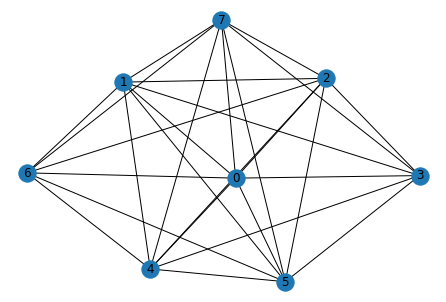

In [89]:
#view graph 
nx.draw(G,with_labels=True)

In [88]:
MinimumVertexCover(G)

MinVerCover:
MINIMIZE
1*node_0 + 1*node_1 + 1*node_2 + 1*node_3 + 1*node_4 + 1*node_5 + 1*node_6 + 1*node_7 + 0
SUBJECT TO
_C1: 7 node_0 + 9 node_1 + 9 node_2 + 8 node_3 + 9 node_4 + 9 node_5
 + 8 node_6 + 9 node_7 >= 1

VARIABLES
0 <= node_0 <= 1 Integer
0 <= node_1 <= 1 Integer
0 <= node_2 <= 1 Integer
0 <= node_3 <= 1 Integer
0 <= node_4 <= 1 Integer
0 <= node_5 <= 1 Integer
0 <= node_6 <= 1 Integer
0 <= node_7 <= 1 Integer

node_0 = 0.0
node_1 = 0.0
node_2 = 0.0
node_3 = 1.0
node_4 = 0.0
node_5 = 0.0
node_6 = 0.0
node_7 = 0.0
Optimal


1.0